 # Delayed Flights Logistic Regression

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, classification_report,  accuracy_score, ConfusionMatrixDisplay

In [3]:
#  Import and read data.
import pandas as pd 
data = "https://airport-efficiency.s3.amazonaws.com/Merged_cleaned_airport_data.csv"
df = pd.read_csv(data)
df.head()

,YEAR,MONTH,DAY_OF_WEEK,BRANDED_CODE_SHARE,ORIGIN,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED,DATE,COVID,DELAY_REASON
0,2018,1,1,UA,BWI,DEN,Colorado,1608,1600.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
1,2018,1,1,UA,BWI,ORD,Illinois,1644,1637.0,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
2,2018,1,1,UA,BWI,IAH,Texas,1806,1800.0,-6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
3,2018,1,1,UA,BWI,IAH,Texas,828,828.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0
4,2018,1,1,UA,BWI,DEN,Colorado,810,802.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0


In [4]:
# Combined Airline and their Codeshare
df.loc[(df.BRANDED_CODE_SHARE == "UA_CODESHARE"), "BRANDED_CODE_SHARE"] = "UA"
df.loc[(df.BRANDED_CODE_SHARE == "AA_CODESHARE"), "BRANDED_CODE_SHARE"] = "AA"
df.loc[(df.BRANDED_CODE_SHARE == "DL_CODESHARE"), "BRANDED_CODE_SHARE"] = "DL"
df.loc[(df.BRANDED_CODE_SHARE == "AS_CODESHARE"), "BRANDED_CODE_SHARE"] = "AS"

In [5]:
# Define regions
northeast = ['Massachusetts',
'Rhode Island',
'Connecticut',
'Vermont',
'New Hampshire',
'Maine',
'Pennsylvania',
'New Jersey',
'New York'
]

souteast = ['Georgia',
'North Carolina',
'South Carolina',
'Virginia',
'West Virginia',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Delaware',
'Maryland',
'Florida',
'Louisiana',
'Arkansas'
]

midwest = ['Minnesota',
'Wisconsin',
'Illinois',
'Ohio',
'Indiana',
'Michigan',
'Missouri',
'Iowa',
'Kansas',
'Nebraska',
'North Dakota',
'South Dakota'
]

southwest = ['New Mexico',
'Arizona',
'Oklahoma',
'Texas'
]

west = ['California',
'Colorado',
'Nevada',
'Hawaii',
'Alaska',
'Oregon',
'Utah',
'Idaho',
'Montana',
'Wyoming',
'Washington'
]

noncontinental = ['U.S. Virgin Islands',
'Puerto Rico'
]

In [6]:
# Add region column
regions=pd.DataFrame([northeast,souteast,midwest,southwest,west,noncontinental],index=['northeast','souteast','midwest','southwest','west','noncontinental'])
regions=regions.reset_index().melt('index')
df['Region'] = df['DEST_STATE_NM'].map(dict(zip(regions['value'],regions['index'])))

In [7]:
# drop more columns
drop = ['DEP_TIME','DEP_DELAY_GROUP',  'DEST_STATE_NM', 'DEST', 'DEP_DELAY', 'LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'NAS_DELAY', 'DELAY_REASON', 'CRS_DEP_TIME' ]
df_dropped = df.drop( drop , 1)

# Encode Columns 
using get_dummies

In [8]:
brand_df = pd.get_dummies(df_dropped, columns=["BRANDED_CODE_SHARE"])
origin_df = pd.get_dummies(brand_df, columns=["ORIGIN"])
region_df = pd.get_dummies(origin_df, columns=["Region"])
final_df = pd.get_dummies(region_df, columns=["DEP_TIME_BLK"])
final_df['DATE'] = pd.to_datetime(final_df['DATE'], format='%Y-%m-%d')
final_df['DAY_OF_MONTH'] = final_df.DATE.dt.day
final_df = final_df.drop('DATE', 1)


 # Separate the features (X) from the target (y) 

In [9]:
y = final_df["DELAYED"]
X = final_df.drop(columns=["DELAYED"])

 # Split our data into training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [11]:
y_test.value_counts()

0.0    222850
1.0     47885
Name: DELAYED, dtype: int64

# Feature Scaling

In [12]:
sc = StandardScaler()
X_scaler = sc.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 # Create a Logistic Regression Model

In [13]:
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
classifier

LogisticRegression(max_iter=1000, random_state=1)

 # Fit (train) model using the training data

In [14]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1)

# Make Predictions

In [15]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
134673,0.0,0.0
623052,0.0,0.0
664881,0.0,0.0
716602,0.0,0.0
832994,0.0,0.0
...,...,...
261363,0.0,0.0
78148,0.0,1.0
524684,0.0,0.0
626830,0.0,0.0


# Validate the model using the test data

In [16]:
y_test.value_counts()

0.0    222850
1.0     47885
Name: DELAYED, dtype: int64

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=[1, 0])
cm_df = pd.DataFrame(
    cm, index=['Actual Delayed (1)', 'Actual On-Time (0)'], 
    columns=['Predicted Delayed (1)', 'Predicted On-Time (0)']
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Delayed (1),Predicted On-Time (0)
Actual Delayed (1),121,47764
Actual On-Time (0),82,222768


Accuracy Score : 0.8232736809056826
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    222850
         1.0       0.60      0.00      0.01     47885

    accuracy                           0.82    270735
   macro avg       0.71      0.50      0.45    270735
weighted avg       0.78      0.82      0.74    270735



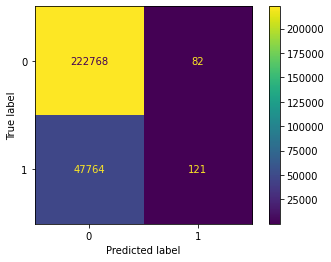

In [19]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions, labels=[0, 1]))
cm.plot()
plt.show()

Feature: 0 , Score: 0.30457
Feature: 1 , Score: 0.07122
Feature: 2 , Score: 0.01837
Feature: 3 , Score: 0.04833
Feature: 4 , Score: 0.03833
Feature: 5 , Score: -0.30596
Feature: 6 , Score: -0.04179
Feature: 7 , Score: -0.01253
Feature: 8 , Score: 0.06328
Feature: 9 , Score: -0.09647
Feature: 10 , Score: 0.02304
Feature: 11 , Score: 0.00991
Feature: 12 , Score: -0.01611
Feature: 13 , Score: -0.03513
Feature: 14 , Score: -0.00466
Feature: 15 , Score: 0.11268
Feature: 16 , Score: 0.05529
Feature: 17 , Score: -0.00796
Feature: 18 , Score: -0.04853
Feature: 19 , Score: -0.02345
Feature: 20 , Score: 0.01255
Feature: 21 , Score: 0.04221
Feature: 22 , Score: -0.01520
Feature: 23 , Score: -0.00582
Feature: 24 , Score: -0.00355
Feature: 25 , Score: -0.08854
Feature: 26 , Score: -0.26456
Feature: 27 , Score: -0.17138
Feature: 28 , Score: -0.16243
Feature: 29 , Score: -0.09412
Feature: 30 , Score: -0.06698
Feature: 31 , Score: -0.07329
Feature: 32 , Score: -0.01776
Feature: 33 , Score: 0.00060
Fea

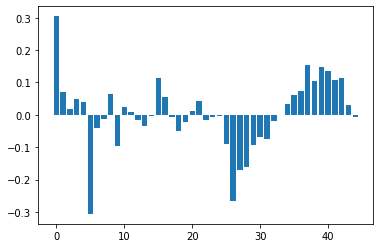

In [20]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d , Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [21]:
columns = list(X)
importance_df = pd.DataFrame({'Feature': columns, 'Importance' : importance})
importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
0,YEAR,0.304573
37,DEP_TIME_BLK_1700-1759,0.153414
39,DEP_TIME_BLK_1900-1959,0.148078
40,DEP_TIME_BLK_2000-2059,0.136790
42,DEP_TIME_BLK_2200-2259,0.115080
15,BRANDED_CODE_SHARE_WN,0.112677
41,DEP_TIME_BLK_2100-2159,0.107923
38,DEP_TIME_BLK_1800-1859,0.104201
36,DEP_TIME_BLK_1600-1659,0.075168
1,MONTH,0.071222
